
# Problem 2 - Automated Feature Engineering 10 points
In the lab, we looked at AutoFeat (https://github.com/cod3licious/autofeat), a python library that auto-
matically does feature engineering and selection for you.

In [1]:
!pip install autofeat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.5/269.5 KB 357.2 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 473.4 kB/s eta 0:00:0000:0100:01
  Attempting uninstall: sympy
    Found existing installation: sympy 1.6.2
    Uninstalling sympy-1.6.2:
      Successfully uninstalled sympy-1.6.2
You should consider upgrading via the '/Users/aragaom/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


1. Explain the importance of interpretability when training machine learning models. Why is model explainability necessary? (2)

Interpretability is important when training machine learning models because it allows us to understand how the model is making decisions and whether it is making those decisions based on the correct factors. This is necessary because if we don't understand how a model is making its predictions, we can't be sure that it is working correctly and we can't trust its decisions. Additionally, if a model is not interpretable, it is difficult to improve or debug it when it is not performing well.Here are some examples of why interpretability is important when training machine learning models:

In healthcare, a machine learning model might be used to predict the likelihood that a patient has a particular disease. If the model is not interpretable, it might be difficult to understand why the model is making a certain prediction, which could lead to incorrect treatment decisions.
In finance, a machine learning model might be used to predict the likelihood that a customer will default on a loan. If the model is not interpretable, it might be difficult to understand why the model is making a certain prediction, which could lead to unfair lending decisions.
In criminal justice, a machine learning model might be used to predict the likelihood that a defendant will commit a crime in the future. If the model is not interpretable, it might be difficult to understand why the model is making a certain prediction, which could lead to unfair sentencing decisions.

2. Perform feature selection for the Diabetes regression dataset, using FeatureSelector(). How many features are discarded? (3)

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from autofeat import FeatureSelector, AutoFeatRegressor
from sklearn.datasets import load_diabetes

X,Y = load_diabetes(return_X_y =True)

fsel = FeatureSelector(verbose=1)
X =pd.DataFrame(X, columns=["age", "sex", "bmi", "bp", "tc", "ldl", "hdl", "tch", "ltg", "glu"])
new_X = fsel.fit_transform(X, Y)
print(new_X.columns)

[featsel] Scaling data...done.
[featsel] Feature selection run 1/5
[featsel] Feature selection run 2/5
[featsel] Feature selection run 3/5
[featsel] Feature selection run 4/5
[featsel] Feature selection run 5/5
[featsel] 7 features after 5 feature selection runs
[featsel] 7 features after correlation filtering
[featsel] 5 features after noise filtering
Index(['bp', 'sex', 'ltg', 'bmi', 'hdl'], dtype='object')


3. Perform a train-test split on your dataset. Select a regression model from SKLearn and fit it to the training dataset. What is the R2 score on the training and test set? (2)


In [17]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X,Y , test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
r_squared = lr.score(X_train, y_train)
print(r_squared)

0.5279198995709651


4. Keeping the train and test dataset same, run 3 feature engineering steps using AutoFeatRegressor(). What is the R2 score on the training and test set now? Mention any five new features generated by the output of AutoFeatRegressor() (3)

### AutoFeat with 3 feateng_steps
[AutoFeat] The 3 step feature engineering process could generate up to 60445 features.
[AutoFeat] With 353 data points this new feature matrix would use about 0.09 gb of space.
[feateng] Step 1: transformation of original features
[feateng] Generated 45 transformed features from 10 original features - done.
[feateng] Step 2: first combination of features
[feateng] Generated 5789 feature combinations from 1485 original feature tuples - done.
[feateng] Step 3: transformation of new features


/Users/aragaom/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/aragaom/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:247: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


[feateng] Generated 24431 transformed features from 5789 original features - done.
[feateng] Generated altogether 32266 new features in 3 steps
[feateng] Removing correlated features, as well as additions at the highest level


/Users/aragaom/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1745: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr, where=where)


[feateng] Generated a total of 14865 additional features
[featsel] Scaling data...done.
[featsel] Feature selection run 1/5
[featsel] Feature selection run 2/5
[featsel] Feature selection run 3/5
[featsel] Feature selection run 4/5
[featsel] Feature selection run 5/5
[featsel] 34 features after 5 feature selection runs
[featsel] 31 features after correlation filtering
[featsel] 10 features after noise filtering
[AutoFeat] Computing 10 new features.
[AutoFeat]    10/   10 new features ...done.
[AutoFeat] Final dataframe with 20 feature columns (10 new).
[AutoFeat] Training final regression model.
[AutoFeat] Trained model: largest coefficients:
-93.39915681931626
842396.908959 * age**3*sex
-4196.512917 * exp(hdl)*Abs(sex)
324.736165 * exp(bmi)*exp(bp)
226.896162 * Abs(bmi + Abs(glu))
54.608046 * exp(bp)*exp(ltg)
52.069876 * exp(bmi)*exp(ltg)
20.515184 * Abs(ltg)/ltg
-0.852666 * hdl/Abs(bmi)
-0.036499 * 1/(-bp**2 + ltg)
-0.006938 * 1/(-Abs(glu) + Abs(ltg))
[AutoFeat] Final score: 0.5894
[

Text(0.5, 1.0, '3 FE steps (R^2: 0.5894; 10 new features)')

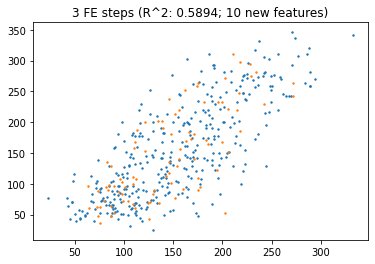

In [18]:
np.random.seed(42)
print("### AutoFeat with %i feateng_steps" % 3)
afreg = AutoFeatRegressor(verbose=1, feateng_steps=3)
df = afreg.fit_transform(X_train, y_train)
r2_train = afreg.score(X_train, y_train)
r2_test = afreg.score(X_test, y_test)
print("## Final Train R^2: %.4f" % r2_train)
print("## Final Test R^2: %.4f" % r2_test)
plt.figure()
plt.scatter(afreg.predict(X_train), y_train, s=2)
plt.scatter(afreg.predict(X_test), y_test, s=2)
plt.title("%i FE steps (R^2: %.4f; %i new features)" % (3, r2_train, len(afreg.new_feat_cols_)))

In [19]:
for col in df.columns:
    if col not in X_train.columns:
        print(col)

Abs(ltg)/ltg
exp(bmi)*exp(bp)
exp(bmi)*exp(ltg)
exp(hdl)*Abs(sex)
hdl/Abs(bmi)
Abs(bmi + Abs(glu))
age**3*sex
exp(bp)*exp(ltg)
1/(-bp**2 + ltg)
1/(-Abs(glu) + Abs(ltg))
